Загружаем датасет

In [130]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = kagglehub.dataset_download("sameelie/resume-hh")
df = pd.read_csv(f'{dataset_path}/hh_ru.csv', sep=';')
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

In [132]:
df.isnull().sum()

,0
"Пол, возраст",0
ЗП,0
Ищет работу на должность:,0
"Город, переезд, командировки",0
Занятость,0
График,0
Опыт работы,168
Последнее/нынешнее место работы,1
Последняя/нынешняя должность,2
Образование и ВУЗ,0


In [133]:
df.dropna(inplace=True)

# Предобработка данных

In [134]:
import re
import math
from pandas.api.types import is_numeric_dtype

Делим колонку 'Пол, возраст' на две и переводим в числовые колонки
* М - 1
* Ж - 0

In [135]:
if df.columns.__contains__('Пол, возраст'):
    sex_age_col = df['Пол, возраст'].values
    sex_col = []
    age_col = []
    for row in sex_age_col:
        sex = row.split(',')[0].strip()
        sex_col.append(int(sex.startswith('М')))
        age = re.findall('\d+', row.split(',')[1])[0]
        age_col.append(int(age))
    df['Пол'] = sex_col
    df['Возраст'] = age_col
    df = df.drop(columns=['Пол, возраст'])

Превращаем колонку 'ЗП' в числовую

In [136]:
if not is_numeric_dtype(df['ЗП']):
    salary_col = df['ЗП'].values
    df['ЗП'] = [int(re.findall('\d+', val)[0]) for val in salary_col]

Превращаем колонку 'Авто' в числовую
* Есть авто - 1
* Нет авто/нет данных - 0

In [137]:
if not is_numeric_dtype(df['Авто']):
    is_car_exists_col = df['Авто'].values
    df['Авто'] = [int(val.strip().startswith('Имеется')) for val in is_car_exists_col]

Разбиваем колонку 'Город, переезд, командировки' на три

In [138]:
if df.columns.__contains__('Город, переезд, командировки'):
    city_moving_trips_col = df['Город, переезд, командировки'].values
    city_col = []
    moving_col = []
    trip_col = []

    for row in city_moving_trips_col:
        city_col.append(row.split(',')[0].strip())
        moving_col.append(int(re.search(r'не готов(?:а)? к переезду', row) is None))
        trip_col.append(int(re.search(r'не готов(?:а)? к командировкам', row) is None))
    df['Город'] = city_col
    df['Переезд'] = moving_col
    df['Командировки'] = trip_col
    df = df.drop(columns=['Город, переезд, командировки'])

Разбиваем колонку 'Занятость' на несколько: 'волонтерство', 'полная занятость', 'проектная работа', 'стажировка', 'частичная занятость'

In [139]:
if df.columns.__contains__('Занятость'):
    work_type_col = df['Занятость'].values
    new_cols = {
        'Волонтерство': [],
        'Полная занятость': [],
        'Проектная работа': [],
        'Стажировка': [],
        'Частичная занятость': []
    }

    for row in work_type_col:
        for col in new_cols.keys():
            is_col_exists = row.find(col.lower()) >= 0
            new_cols[col].append(int(is_col_exists))
    for col in new_cols:
        df[col] = new_cols[col]
    df = df.drop(columns=['Занятость'])

Превращаем колонку 'Опыт работы' в числовую

In [140]:
if not is_numeric_dtype(df['Опыт работы']):
    work_experience_col = df['Опыт работы'].values
    work_experience_month_col = []

    # regex patterns
    year_pattern = r'Опыт работы (\d+) (?:год(?:а)?|лет).*'
    month_pattern = r'Опыт работы(?: \d+ (?:год(?:а)?|лет))? (\d+) месяц(?:а|ев)?.*'

    for row in work_experience_col:
        exp = 0
        if not(type(row).__name__ == 'float' and math.isnan(row)):
            matcher = re.compile(year_pattern, flags=re.IGNORECASE)
            match_val = matcher.match(row)
            if match_val: # год
                exp += (int(match_val.group(1)) * 12)

            matcher = re.compile(month_pattern, flags=re.IGNORECASE)
            match_val = matcher.match(row)
            if match_val: # месяц
                exp += int(match_val.group(1))
        if exp == 0:
            work_experience_month_col.append(0)
        elif exp >= 12 and exp <= 36:
            work_experience_month_col.append(1)
        elif exp > 36 and 72:
            work_experience_month_col.append(2)
        else:
            work_experience_month_col.append(3)
    df['Опыт работы'] = work_experience_month_col

Превращаем колонку 'График' в числовую

In [141]:
if df.columns.__contains__('График'):
    work_schedule_col = df['График'].values
    work_schedule_type_col = {
        'Вахтовый метод': [],
        'Гибкий график': [],
        'Полный день': [],
        'Сменный график': [],
        'Удаленная работа': []
    }

    for row in work_schedule_col:
        for col in work_schedule_type_col.keys():
            is_col_exists = row.find(col.lower()) >= 0
            work_schedule_type_col[col].append(int(is_col_exists))
    for col in work_schedule_type_col.keys():
        df[col] = work_schedule_type_col[col]
    df = df.drop(columns=['График'])

Убираем странные резюме

In [142]:
drop_idx = []
min_work_age = 14 # по ТК РФ
for idx, row in df.iterrows():
    if row['Возраст'] < min_work_age:
        drop_idx.append(idx)
    elif row['Возраст'] == min_work_age and row['Опыт работы'] > 11:
        drop_idx.append(idx)
    elif ((row['Возраст'] - min_work_age) * 12 + 11) < row['Опыт работы']:
        drop_idx.append(idx)
    elif row['Возраст'] > 64:
        drop_idx.append(idx)
df = df.drop(drop_idx)

Превращаем колонку "Образование и ВУЗ" в числовую
* Среднее образование - 0
* Неоконченное высшее - 1
* Среднее специальное - 2
* Высшее образование - 3

In [143]:
import pandas as pd
import operator

keys = [
    'Среднее образование',
    'Среднее специальное',
    'Неоконченное высшее',
    'Высшее образование'
]
if not is_numeric_dtype(df['Образование и ВУЗ']):
  df['Образование и ВУЗ'] = df['Образование и ВУЗ'].astype(str).apply(lambda x: ' '.join(x.split()[:2]))
  df['Образование и ВУЗ'] = [operator.indexOf(keys, item) for item in df['Образование и ВУЗ'].values]

Расширяем категории

In [144]:
categories = {
    "IT и Разработка программного обеспечения": [
        "разработчик", "программист", "devops", "администратор", "системный", "сетевой", "data", "аналитик",
        "qa", "тестировщик", "frontend", "backend", "full stack", "web", "software", "it", "инженер ит",
        "python", "java", "c#", "javascript", "ruby", "php", "sql", "oracle", "sap", "unity", "android", "ios",  "C/C++",
        "блокчейн", "машинное обучение", "ai", "архитектор", "dev", "engineer", "технический специалист"
    ],
    "Управление и Руководство": [
        "руководитель", "начальник", "менеджер", "управляющий", "директор",
        "заместитель", "супервайзер", "бригадир", "прораб", "мастер",
        "координатор", "руководство", "head of", "team lead", "лидер",
        "управление", "заведующий", "главный", "ведущий", "зам.", "ROP"
    ],
    "Дизайн и UX/UI": [
        "дизайнер", "ux", "ui", "графический", "веб-дизайнер", "3d", "моушн", "иллюстратор", "художник",
        "визуализатор", "арт", "верстальщик", "web design", "графика"
    ],
    "Творчество и Медиа": [
        "дизайнер", "креативный", "продюсер", "редактор", "сценарист",
        "художник", "видеомонтажер", "VFX", "motion", "геймдизайнер",
        "звукорежиссер", "иллюстратор", "копирайтер", "арт", "аниматор"
    ],
    "Маркетинг и Продажи": [
        "маркетолог", "seo", "smm", "таргетолог", "копирайтер", "контент", "продажи", "менеджер по продажам",
        "e-commerce", "digital", "реклама", "аналитик маркетинга", "product marketing", "brand",
        "продажи", "менеджер по продажам", "торговый представитель",
        "региональный представитель", "кассир", "консультант",
        "мерчендайзер", "супервайзер", "аккаунт-менеджер", "KAM",
        "клиентский менеджер", "сейлз", "розничная торговля", "ритейл"
    ],
    "Технические специальности": [
        "инженер", "техник", "монтажник", "электрик", "связи", "кипиа",
        "волс", "скс", "слаботочные системы", "ремонт", "обслуживание",
        "электроник", "радио", "телекоммуникации", "сварщик", "опс",
        "наладчик", "механик", "электромеханик", "конструктор", "проектировщик"
    ],
    "Образование и Наука": [
        "учитель", "преподаватель", "методист", "научный сотрудник", "образование", "обучение", "тренер",
        "лектор", "исследователь", "ассистент", "студент", "стажер"
    ],
    "Финансы и Экономика": [
        "бухгалтер", "экономист", "финансист", "аналитик", "аудит", "кассир", "операционист", "финансовый",
        "бюджет", "учет", "контролер"
    ],
    "Администрирование и Поддержка": [
        "администратор", "помощник", "секретарь", "офис-менеджер", "ресепшн", "координатор", "ассистент",
        "менеджер офиса", "дежурный", "оператор", "диспетчер", "поддержка", "helpdesk", "сервис"
    ],
    "Другие": [
        "водитель", "грузчик", "курьер", "охранник", "кладовщик", "уборщик", "сборщик", "оператор",
        "логист", "специалист", "работник", "сотрудник", "стажер", "ученик"
    ]
}

In [145]:
def categorize_profession(profession):
    profession_lower = profession.lower()
    for category, keywords in categories.items():
        if any(keyword in profession_lower for keyword in keywords):
            return category
    return "Прочее"


if df.columns.__contains__('Ищет работу на должность:'):
  df['Отрасль'] = df['Ищет работу на должность:'].apply(categorize_profession)
  df = pd.get_dummies(df, columns=['Отрасль'], prefix='Отрасль')
  df = df.drop(columns=['Ищет работу на должность:'])

Результат

In [146]:
df.head()

,ЗП,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто,Пол,Возраст,Город,...,Отрасль_Администрирование и Поддержка,Отрасль_Дизайн и UX/UI,Отрасль_Другие,Отрасль_Маркетинг и Продажи,Отрасль_Образование и Наука,Отрасль_Прочее,Отрасль_Творчество и Медиа,Отрасль_Технические специальности,Отрасль_Управление и Руководство,Отрасль_Финансы и Экономика
0,29000,2,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2,16.04.2019 15:59,1,1,39,Советск (Калининградская область),...,False,False,False,False,False,False,False,False,False,False
1,40000,2,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",3,12.04.2019 08:42,0,1,60,Королев,...,False,False,False,False,False,True,False,False,False,False
2,20000,2,ПАО Сбербанк,Кассир-операционист,1,16.04.2019 08:35,0,0,36,Тверь,...,True,False,False,False,False,False,False,False,False,False
3,100000,2,OpenSoft,Инженер-программист,3,08.04.2019 14:23,0,1,38,Саратов,...,False,False,False,False,False,False,False,False,False,False
4,140000,2,Мармелад,Менеджер по продажам,3,22.04.2019 10:32,0,0,26,Москва,...,False,False,False,False,False,False,False,False,True,False


In [167]:
import pandas as pd
for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
      print(f'Удаляем: {col}')
      df = df.drop(columns=[col])

Удаляем: Последнее/нынешнее место работы
Удаляем: Последняя/нынешняя должность
Удаляем: Обновление резюме
Удаляем: Город


# Зависимости между признаками

In [147]:
import seaborn as sns

df.corr(numeric_only=True)

,ЗП,Опыт работы,Образование и ВУЗ,Авто,Пол,Возраст,Переезд,Командировки,Волонтерство,Полная занятость,...,Отрасль_Администрирование и Поддержка,Отрасль_Дизайн и UX/UI,Отрасль_Другие,Отрасль_Маркетинг и Продажи,Отрасль_Образование и Наука,Отрасль_Прочее,Отрасль_Творчество и Медиа,Отрасль_Технические специальности,Отрасль_Управление и Руководство,Отрасль_Финансы и Экономика
ЗП,1.000000,0.040040,0.118475,0.016377,0.063638,0.095929,0.066217,0.107096,0.003265,0.051484,...,-0.053370,-0.022233,-0.071585,-0.026920,-0.011547,0.014339,-0.018628,-0.072791,0.101758,-0.009846
Опыт работы,0.040040,1.000000,0.062365,0.052220,0.028469,0.197407,0.006563,0.039990,-0.013308,-0.004304,...,-0.010862,-0.021630,-0.034038,-0.010726,0.011396,-0.011782,-0.002474,-0.002100,0.053783,-0.001106
Образование и ВУЗ,0.118475,0.062365,1.000000,0.077460,-0.052751,0.177318,0.079040,0.175972,-0.011700,0.008461,...,-0.123720,-0.012616,-0.048106,-0.009298,0.002419,0.002897,0.007838,-0.081999,0.119560,0.005449
Авто,0.016377,0.052220,0.077460,1.000000,0.136335,0.087378,0.029604,0.073619,-0.005782,0.017778,...,-0.033677,-0.036072,-0.024264,-0.016483,-0.003178,-0.023642,-0.021837,0.032530,0.057572,-0.004443
Пол,0.063638,0.028469,-0.052751,0.136335,1.000000,0.083977,0.091612,0.092778,0.020505,0.039960,...,-0.126006,-0.028570,-0.053050,-0.037677,-0.027354,-0.042304,-0.051567,0.097119,-0.106416,-0.032355
Возраст,0.095929,0.197407,0.177318,0.087378,0.083977,1.000000,-0.028999,0.086662,-0.017809,0.024820,...,-0.019328,-0.050992,-0.069015,-0.027342,-0.017141,-0.027770,-0.006515,0.028553,0.121049,-0.004397
Переезд,0.066217,0.006563,0.079040,0.029604,0.091612,-0.028999,1.000000,0.304261,0.054942,0.065503,...,-0.059409,0.022213,-0.039351,-0.019543,-0.003288,0.021251,-0.003043,-0.021890,0.032317,0.000817
Командировки,0.107096,0.039990,0.175972,0.073619,0.092778,0.086662,0.304261,1.000000,0.022840,0.100749,...,-0.111290,-0.005678,-0.060159,-0.029874,-0.016613,0.005608,-0.015946,-0.035236,0.100105,-0.014766
Волонтерство,0.003265,-0.013308,-0.011700,-0.005782,0.020505,-0.017809,0.054942,0.022840,1.000000,-0.020188,...,-0.006620,0.021148,-0.002222,0.009106,-0.004036,0.007775,-0.006428,-0.005207,-0.034048,-0.003651
Полная занятость,0.051484,-0.004304,0.008461,0.017778,0.039960,0.024820,0.065503,0.100749,-0.020188,1.000000,...,-0.021880,-0.013162,0.002886,-0.044878,-0.012809,-0.017808,-0.020019,0.036975,0.057336,-0.000951


<Axes: >

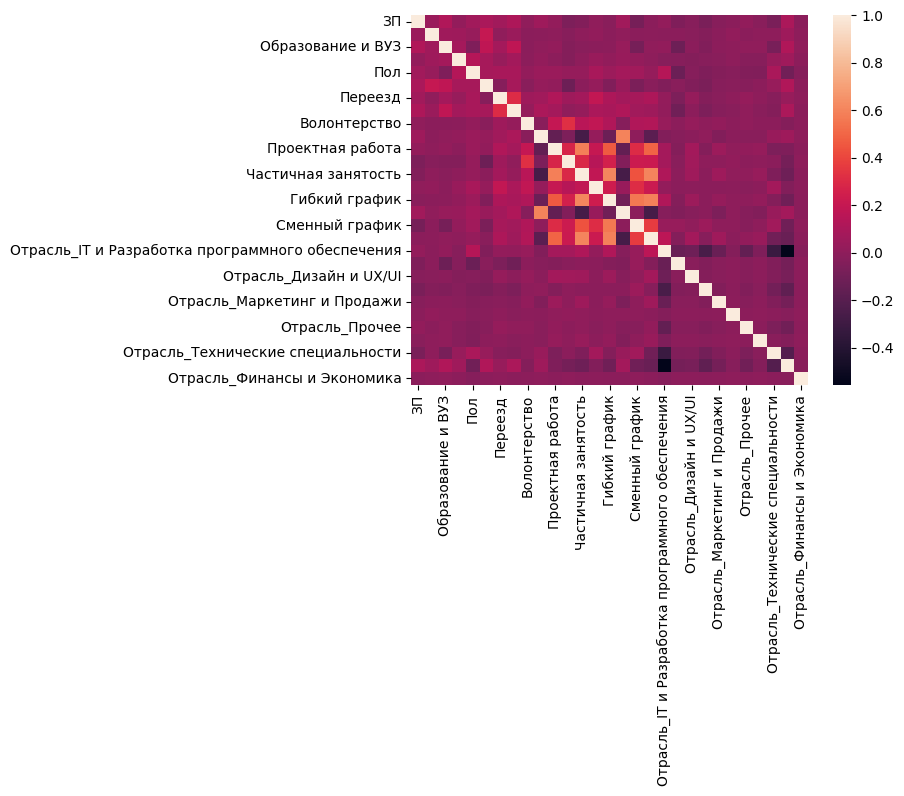

In [148]:
sns.heatmap(df.corr(numeric_only=True))

Смотрим корреляцию с целевой переменной

In [149]:
correlation_with_salary = df.corr(numeric_only=True)['ЗП'].drop('ЗП')
top_correlations = correlation_with_salary.abs().sort_values(ascending=False).head(5)
top_correlations

,ЗП
Образование и ВУЗ,0.118475
Командировки,0.107096
Отрасль_Управление и Руководство,0.101758
Возраст,0.095929
Сменный график,0.084604


# Графики

Смотрим влияние отрасли на ЗП

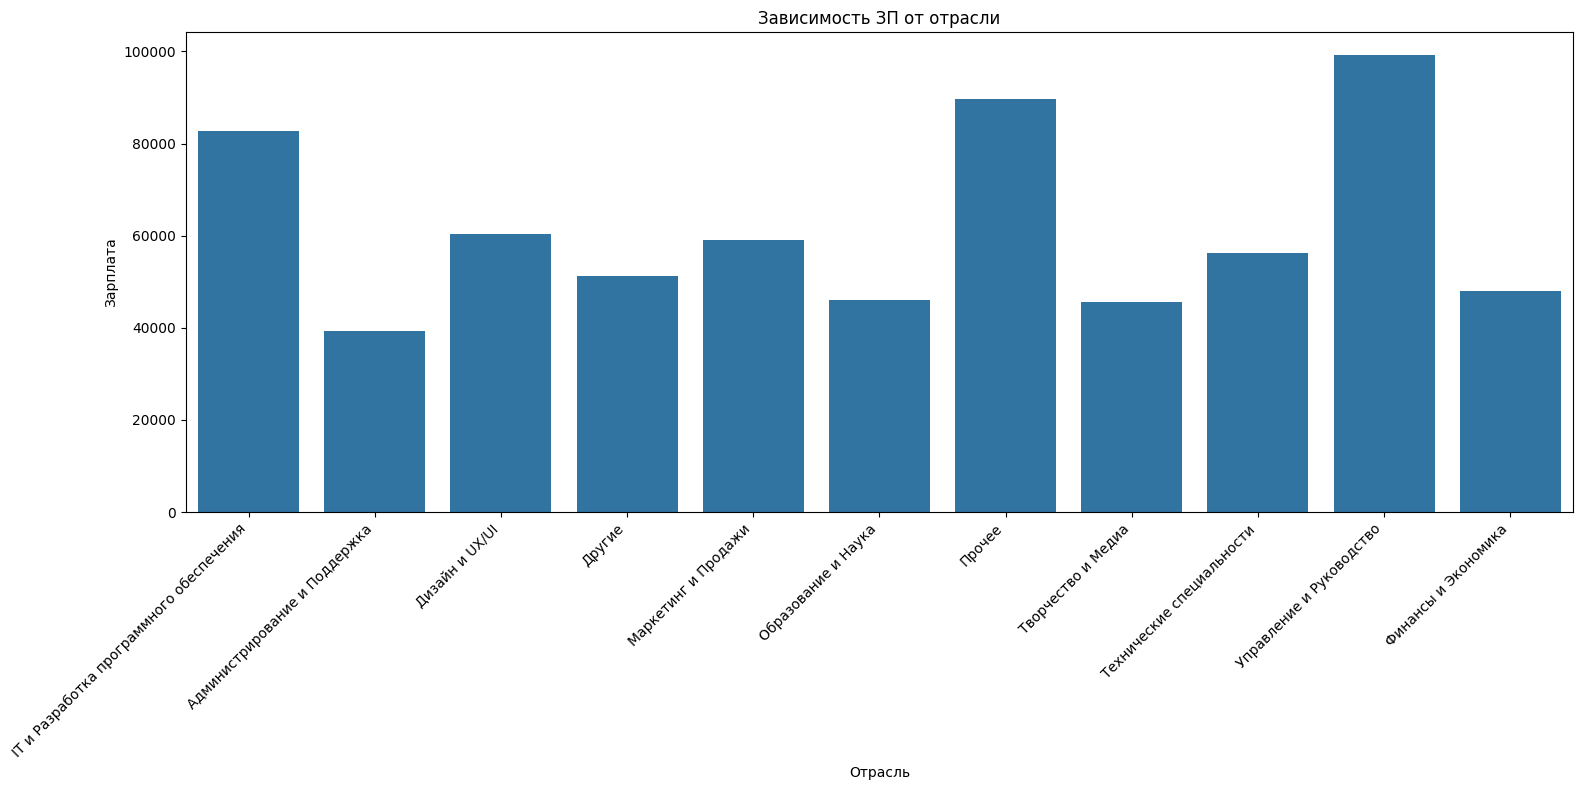

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

industry_salary = df.groupby(df.columns[df.columns.str.startswith('Отрасль_')].tolist())['ЗП'].mean().reset_index()
industry_salary_melted = pd.melt(industry_salary, id_vars=['ЗП'], var_name='Отрасль', value_name='Value')
industry_salary_melted = industry_salary_melted[industry_salary_melted['Value'] == 1]
industry_salary_melted['Отрасль'] = industry_salary_melted['Отрасль'].str.replace('Отрасль_', '')

plt.figure(figsize=(16, 8))
sns.barplot(x='Отрасль', y='ЗП', data=industry_salary_melted)
plt.xticks(rotation=45, ha='right')
plt.title('Зависимость ЗП от отрасли')
plt.xlabel('Отрасль')
plt.ylabel('Зарплата')
plt.tight_layout()
plt.show()

Смотрим влияние образования на ЗП

<ipython-input-151-2bb73f3704d0>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Образование и ВУЗ', y='ЗП', data=df, ci=None)


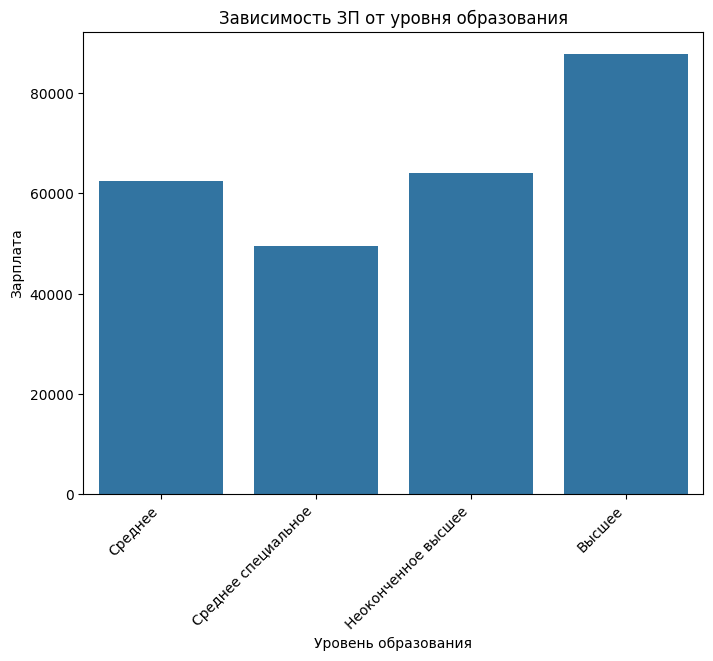

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x='Образование и ВУЗ', y='ЗП', data=df, ci=None)
plt.xticks(ticks=range(4), labels=['Среднее', 'Среднее специальное', 'Неоконченное высшее', 'Высшее'], rotation=45, ha='right')
plt.title('Зависимость ЗП от уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Зарплата')
plt.show()

# Сравнение методов

## Линейная регрессия (ElasticNet)

In [169]:
from sklearn.model_selection import train_test_split

X = df.drop('ЗП', axis=1)
y = df['ЗП']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [170]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [172]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet()
param_grid = {'alpha': [0.1, 1, 5, 10, 50, 100], 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [173]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(estimator=elastic_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.4s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.4s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.4s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.9s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.5s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.5s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.4s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.5s
[CV] END ............................alpha=0.1,

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.595e+13, tolerance: 3.723e+10
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.673e+13, tolerance: 3.729e+10
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+14, tolerance: 4.159e+10
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.436e+13, tolerance: 3.428e+10
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.254e+13, tolerance: 3.174e+10
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.3s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.1s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [174]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.9}

In [182]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Предсказания на тестовом наборе
y_pred = grid_model.predict(X_test)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 45969.96012602098
Root Mean Squared Error (RMSE): 162863.08737083263
